In [55]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from IPython.display import display as dp

In [56]:
carp = 'documents'
customer_rut = os.path.join(carp, 'customers.csv')
order_item_rut = os.path.join(carp, 'order_items.csv')
orders_rut = os.path.join(carp, 'orders.csv')
products_rut = os.path.join(carp, 'products.csv')


In [57]:
# Extraccion de documentos
customer = pd.read_csv(customer_rut)
order_item = pd.read_csv(order_item_rut)
orders = pd.read_csv(orders_rut)
products = pd.read_csv(products_rut)

In [58]:
products.head()

,product_id,category,product_name,cost_price,supplier
0,PROD1000,Electronics,Electronics_Product_0,51.13,Supplier_3
1,PROD1001,Electronics,Electronics_Product_1,66.94,Supplier_9
2,PROD1002,Electronics,Electronics_Product_2,21.71,Supplier_4
3,PROD1003,Electronics,Electronics_Product_3,27.54,Supplier_5
4,PROD1004,Electronics,Electronics_Product_4,21.99,Supplier_8


In [59]:
dp(customer.head())

,customer_id,name,email,signup_date,country
0,CUST0000,Customer_0,user0@example.com,2022-04-13,Colombia
1,CUST0001,Customer_1,user1@example.com,2023-03-12,Mexico
2,CUST0002,Customer_2,user2@example.com,2022-09-28,Mexico
3,CUST0003,Customer_3,user3@example.com,2022-04-17,Mexico
4,CUST0004,Customer_4,user4@example.com,2022-03-13,Colombia


In [60]:
dp(orders.head())

,order_id,customer_id,order_date,order_status,shipping_cost,payment_method,total_amount
0,ORD00000,CUST0176,2023-01-07,Cancelled,10.23,Bank Transfer,0.00
1,ORD00001,CUST0195,2023-05-25,Completed,4.00,PayPal,663.54
2,ORD00002,CUST0142,2023-07-30,Completed,4.97,Credit Card,51.19
3,ORD00003,CUST0078,2023-02-16,Completed,14.37,Credit Card,327.77
4,ORD00004,CUST0088,2023-04-22,Completed,11.59,Credit Card,398.77


In [61]:
# Filtrar los pedido completados

In [62]:
complete_orders= orders[orders['order_status'] == 'Completed']

In [62]:
complete_orders= orders[orders['order_status'] == 'Completed']

In [63]:
# Unir con los orders Items
merge_item = pd.merge(order_item, complete_orders, on='order_id', how='inner')
dp(merge_item.head())

,order_id,product_id,category,product_name,quantity,unit_price,discount,customer_id,order_date,order_status,shipping_cost,payment_method,total_amount
0,ORD00001,PROD1238,Books,Books_Product_39,3,41.94,10,CUST0195,2023-05-25,Completed,4.00,PayPal,663.54
1,ORD00001,PROD1164,Toys,Toys_Product_2,3,121.19,5,CUST0195,2023-05-25,Completed,4.00,PayPal,663.54
2,ORD00001,PROD1235,Books,Books_Product_36,2,118.18,15,CUST0195,2023-05-25,Completed,4.00,PayPal,663.54
3,ORD00002,PROD1219,Books,Books_Product_20,2,27.19,15,CUST0142,2023-07-30,Completed,4.97,Credit Card,51.19
4,ORD00003,PROD1073,Clothing,Clothing_Product_23,1,70.06,5,CUST0078,2023-02-16,Completed,14.37,Credit Card,327.77


In [64]:
# Unir con los products

In [65]:
merge_products = pd.merge(merge_item, products[['product_id', 'cost_price']], on='product_id', how='left')

In [66]:
dp(merge_products.head())

,order_id,product_id,category,product_name,quantity,unit_price,discount,customer_id,order_date,order_status,shipping_cost,payment_method,total_amount,cost_price
0,ORD00001,PROD1238,Books,Books_Product_39,3,41.94,10,CUST0195,2023-05-25,Completed,4.00,PayPal,663.54,28.21
1,ORD00001,PROD1164,Toys,Toys_Product_2,3,121.19,5,CUST0195,2023-05-25,Completed,4.00,PayPal,663.54,98.79
2,ORD00001,PROD1235,Books,Books_Product_36,2,118.18,15,CUST0195,2023-05-25,Completed,4.00,PayPal,663.54,60.72
3,ORD00002,PROD1219,Books,Books_Product_20,2,27.19,15,CUST0142,2023-07-30,Completed,4.97,Credit Card,51.19,22.53
4,ORD00003,PROD1073,Clothing,Clothing_Product_23,1,70.06,5,CUST0078,2023-02-16,Completed,14.37,Credit Card,327.77,52.80


In [67]:
# CAlculo para sacar ingreso por grupo
merge_products['ingreso_bruto'] = merge_products['unit_price']*merge_products['quantity']
merge_products['descuento']= merge_products['unit_price']*merge_products['discount'] / 100 * merge_item['quantity']
merge_products['costo'] = merge_products['cost_price'] * merge_products['quantity']

In [68]:
dp(merge_products[['category', 'ingreso_bruto', 'descuento', 'costo', 'shipping_cost']])

,category,ingreso_bruto,descuento,costo,shipping_cost
0,Books,125.82,12.5820,84.63,4.00
1,Toys,363.57,18.1785,296.37,4.00
2,Books,236.36,35.4540,121.44,4.00
3,Books,54.38,8.1570,45.06,4.97
4,Clothing,70.06,3.5030,52.80,14.37
...,...,...,...,...,...
3210,Home,166.19,16.6190,83.14,7.40
3211,Toys,364.98,18.2490,299.04,7.40
3212,Electronics,287.31,0.0000,169.62,7.40
3213,Books,24.64,1.2320,17.65,10.35


In [69]:
# Resumen por categoria
resumen_categoria = merge_products.groupby('category').agg({
    'ingreso_bruto':'sum',
    'costo':'sum',
    'descuento':'sum',
    'shipping_cost':'sum'
})

In [130]:
dp(resumen_categoria)

,ingreso_bruto,costo,descuento,shipping_cost,ingreso_neto,Formateado_incompleto
category,,,,,,
Books,94874.19,59183.62,4498.6240,5768.04,25423.9060,25423.91
Clothing,144331.85,89073.52,6937.8845,7066.00,41254.4455,41254.45
Electronics,100475.05,63623.44,4391.0320,5624.34,26836.2380,26836.24
Home,107704.97,66308.00,4836.3210,5582.88,30977.7690,30977.77
Toys,84057.09,53371.92,3574.2415,3634.55,23476.3785,23476.38


In [131]:
resumen_categoria['ingreso_neto'] = resumen_categoria['ingreso_bruto'] - resumen_categoria['costo'] - resumen_categoria['descuento'] - resumen_categoria['shipping_cost']
resumen_categoria['Formateado_incompleto'] = resumen_categoria['ingreso_neto'].map('{:.2f}'.format)

In [132]:
dp(resumen_categoria)

,ingreso_bruto,costo,descuento,shipping_cost,ingreso_neto,Formateado_incompleto
category,,,,,,
Books,94874.19,59183.62,4498.6240,5768.04,25423.9060,25423.91
Clothing,144331.85,89073.52,6937.8845,7066.00,41254.4455,41254.45
Electronics,100475.05,63623.44,4391.0320,5624.34,26836.2380,26836.24
Home,107704.97,66308.00,4836.3210,5582.88,30977.7690,30977.77
Toys,84057.09,53371.92,3574.2415,3634.55,23476.3785,23476.38


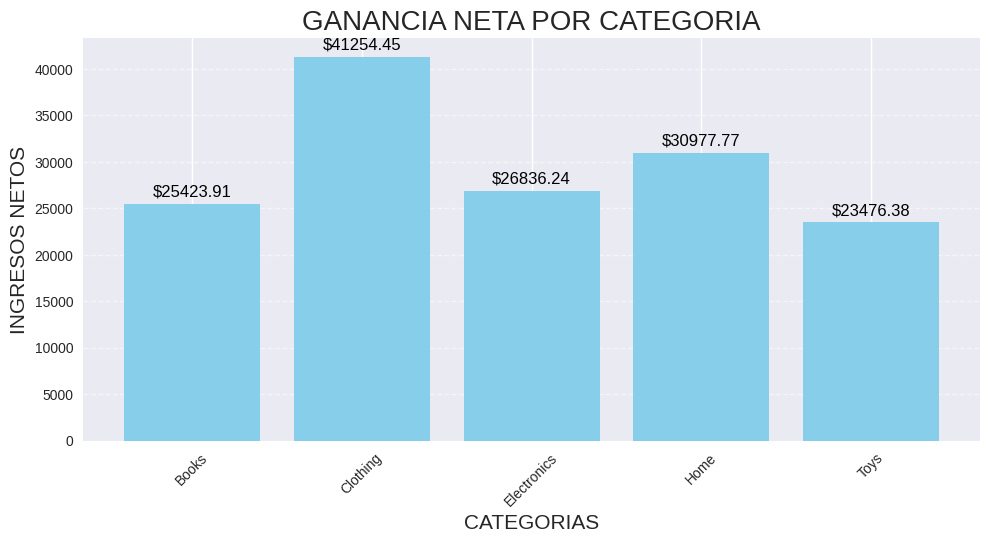

In [133]:
# Grafico todos mis valores con matplotlib

# Configurar estilo de gráfico
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(10,6))
categorias = resumen_categoria.index.get_level_values('category')
bars = plt.bar(categorias, resumen_categoria['ingreso_neto'], color='skyblue')
plt.xlabel('CATEGORIAS', size=15)
plt.ylabel('INGRESOS NETOS', size=15)
plt.title('GANANCIA NETA POR CATEGORIA', size=20)
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Calcular la altura máxima de las barras
max_height = resumen_categoria['ingreso_neto'].max()

# Agregar etiquetas de valor ENCIMA DEL BORDE SUPERIOR DE CADA BARRA
for bar in bars:
    yval = bar.get_height()
    x_pos = bar.get_x() + bar.get_width() / 2  # Centrado horizontalmente
    y_pos = yval + 500                         # Un poco por encima de la barra
    plt.text(x_pos, y_pos, f'${yval:.2f}', 
             ha='center', va='bottom', fontsize=12, color='black')

# Ajustar el espacio superior del gráfico
plt.subplots_adjust(top=0.85)  # Mayor espacio para el título

# Mostrar el gráfico
plt.show()

In [134]:
df_rfm = complete_orders.copy()

In [135]:
dp(df_rfm.head())

,order_id,customer_id,order_date,order_status,shipping_cost,payment_method,total_amount
1,ORD00001,CUST0195,2023-05-25,Completed,4.00,PayPal,663.54
2,ORD00002,CUST0142,2023-07-30,Completed,4.97,Credit Card,51.19
3,ORD00003,CUST0078,2023-02-16,Completed,14.37,Credit Card,327.77
4,ORD00004,CUST0088,2023-04-22,Completed,11.59,Credit Card,398.77
6,ORD00006,CUST0090,2023-02-15,Completed,7.98,Bank Transfer,120.80


In [136]:
# Limpiar la informa para el paso 2
from datetime import timedelta

In [141]:
df_rfm['order_date']= pd.to_datetime(df_rfm['order_date'])
fecha_referencia = df_rfm['order_date'].max() + timedelta(days=1)

In [146]:
# Agrupar por cliente y Calcular RFM
#AGRUPAR POR CLIENTE Y CALCULAR RFM
rfm= df_rfm.groupby('customer_id').agg({
    'order_date': lambda x: (fecha_referencia - x.max()).days,# R RECENCY: FRESCURA MENOR ES MEJOR
    'order_id':'count',#F FRECUENCY FRECUENCIA EN LA QUE COMPRA MAYOR ES MEJOR
    'total_amount':'sum'#M MONETARY CUANTO GASTO MAYOR  ES MEJOR
}).reset_index()

# Mostrar las primeras filas del DataFrame resultante
dp(rfm.head())

,customer_id,order_date,order_id,total_amount
0,CUST0000,190,3,1888.30
1,CUST0001,24,3,1265.92
2,CUST0002,65,7,2826.36
3,CUST0003,59,5,1392.31
4,CUST0004,176,5,1945.47


In [147]:
#ASIGNAR PUNTAJES 5 MEJOR PUNTAJE 1 PEOR PUNTAJE
rfm['R_puntaje']=pd.qcut(rfm['order_date'],5,labels=[5,4,3,2,1])
rfm['F_puntaje']=pd.qcut(rfm['order_id'],5,labels=[1,2,3,4,5])
rfm['M_puntaje']=pd.qcut(rfm['total_amount'],5,labels=[1,2,3,4,5])

In [148]:
dp(rfm.head())

,customer_id,order_date,order_id,total_amount,R_puntaje,F_puntaje,M_puntaje
0,CUST0000,190,3,1888.30,1,1,3
1,CUST0001,24,3,1265.92,4,1,2
2,CUST0002,65,7,2826.36,3,5,5
3,CUST0003,59,5,1392.31,3,3,3
4,CUST0004,176,5,1945.47,1,3,4


In [149]:
rfm['RFM_puntaje']= rfm['R_puntaje'].astype(str) + rfm['F_puntaje'].astype(str) + rfm['M_puntaje'].astype(str)

In [150]:
dp(rfm.head())

,customer_id,order_date,order_id,total_amount,R_puntaje,F_puntaje,M_puntaje,RFM_puntaje
0,CUST0000,190,3,1888.30,1,1,3,113
1,CUST0001,24,3,1265.92,4,1,2,412
2,CUST0002,65,7,2826.36,3,5,5,355
3,CUST0003,59,5,1392.31,3,3,3,333
4,CUST0004,176,5,1945.47,1,3,4,134


In [151]:
def segmentacion_cliente(rfm):
    r=int(rfm['R_puntaje'])
    f=int(rfm['F_puntaje'])
    m=int(rfm['M_puntaje'])

    if (r == 5) and (f == 5) and (m == 5):
        return 'TOP CLIENTE'
    elif r >= 3 and f >= 3 and m >=3:
        return 'CLIENTE LEAL'
    elif r >= 4 and  f <= 2:
        return 'CLIENTE NUEVO'
    elif r <= 2 and f >= 4:
        return 'CLIENTE EN RIESGO'
    elif f <= 2 and m <= 2:
        return 'CLIENTE PERDIDO'
    else:
        return 'CLIENTE BAJO POTENCIAL'

In [152]:
rfm['Clasificar']=rfm.apply(segmentacion_cliente,axis=1)

In [153]:
dp(rfm.head())

,customer_id,order_date,order_id,total_amount,R_puntaje,F_puntaje,M_puntaje,RFM_puntaje,Clasificar
0,CUST0000,190,3,1888.30,1,1,3,113,CLIENTE BAJO POTENCIAL
1,CUST0001,24,3,1265.92,4,1,2,412,CLIENTE NUEVO
2,CUST0002,65,7,2826.36,3,5,5,355,CLIENTE LEAL
3,CUST0003,59,5,1392.31,3,3,3,333,CLIENTE LEAL
4,CUST0004,176,5,1945.47,1,3,4,134,CLIENTE BAJO POTENCIAL


In [154]:
resumen_segmentos = rfm['Clasificar'].value_counts().reset_index()
resumen_segmentos.columns = ['Clasificacion', 'Cantidad']
dp(resumen_segmentos)

,Clasificacion,Cantidad
0,CLIENTE LEAL,91
1,CLIENTE PERDIDO,87
2,CLIENTE NUEVO,50
3,CLIENTE BAJO POTENCIAL,46
4,CLIENTE EN RIESGO,16
5,TOP CLIENTE,9


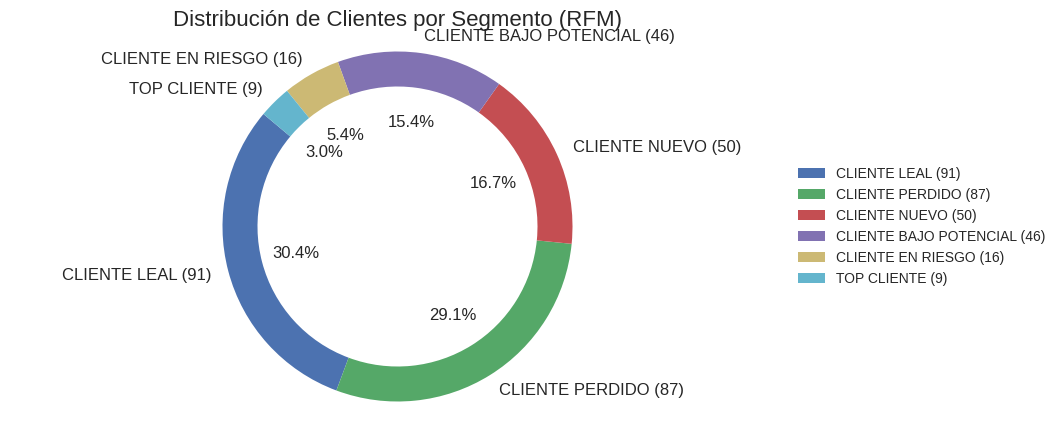

In [155]:
plt.figure(figsize=(10,5))
plt.pie(resumen_segmentos['Cantidad'], 
        labels=[f"{label} ({count})" for label, count in zip(resumen_segmentos['Clasificacion'], resumen_segmentos['Cantidad'])],
        autopct='%1.1f%%',
        startangle=140,
        shadow=False,
        textprops={'fontsize': 12},
        wedgeprops={'width':0.2}
)
    
plt.title('Distribución de Clientes por Segmento (RFM)', fontsize=16)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=10)
plt.axis('equal')
plt.show()



In [156]:
clientes_valiosos=rfm[rfm['Clasificar'].isin(['TOP CLIENTE', 'CLIENTE LEAL', 'CLIENTE NUEVO'])]

In [157]:
clientes_valiosos=clientes_valiosos[['customer_id']]

In [158]:
dp(clientes_valiosos)

,customer_id
1,CUST0001
2,CUST0002
3,CUST0003
9,CUST0009
12,CUST0012
...,...
287,CUST0288
288,CUST0289
289,CUST0290
292,CUST0293


In [159]:
# 3.	Detección de Productos con Baja Rentabilidad o Alta Tasa de Devolución
# o	¿Qué productos o categorías tienen más devoluciones?
# o	¿Cuáles generan pérdidas?

In [160]:
print(orders['order_status'].unique())

['Cancelled' 'Completed' 'Returned']


In [162]:
#EXTRAER LOS DATOS DEVUELTOS DE ORDERS
devoluciones=orders[orders['order_status']=='Returned'].reset_index(drop=True)

In [164]:
dp(devoluciones.head(10))

,order_id,customer_id,order_date,order_status,shipping_cost,payment_method,total_amount
0,ORD00009,CUST0079,2023-07-12,Returned,4.28,Bank Transfer,395.87
1,ORD00025,CUST0197,2023-07-25,Returned,11.68,PayPal,485.61
2,ORD00067,CUST0037,2023-05-20,Returned,14.69,Bank Transfer,166.46
3,ORD00140,CUST0140,2023-07-18,Returned,7.19,Credit Card,607.36
4,ORD00159,CUST0253,2023-04-02,Returned,7.92,PayPal,174.68
5,ORD00220,CUST0037,2023-08-07,Returned,6.14,PayPal,413.63
6,ORD00251,CUST0149,2023-12-14,Returned,12.49,Bank Transfer,469.59
7,ORD00253,CUST0149,2023-10-18,Returned,7.45,Bank Transfer,314.67
8,ORD00260,CUST0299,2023-06-07,Returned,6.06,PayPal,281.56
9,ORD00280,CUST0192,2023-01-30,Returned,14.73,Bank Transfer,592.08


In [166]:
productos_devueltos=devoluciones[['order_id']].merge(order_item, on='order_id', how='inner')

In [167]:
dp(productos_devueltos)

,order_id,product_id,category,product_name,quantity,unit_price,discount
0,ORD00009,PROD1202,Books,Books_Product_3,3,80.33,0
1,ORD00009,PROD1118,Home,Home_Product_6,3,15.79,15
2,ORD00009,PROD1048,Electronics,Electronics_Product_48,1,110.34,0
3,ORD00025,PROD1001,Electronics,Electronics_Product_1,3,81.16,10
4,ORD00025,PROD1227,Books,Books_Product_28,3,99.92,15
...,...,...,...,...,...,...,...
204,ORD01465,PROD1096,Clothing,Clothing_Product_46,2,145.17,15
205,ORD01477,PROD1213,Books,Books_Product_14,3,33.20,10
206,ORD01477,PROD1088,Clothing,Clothing_Product_38,1,63.86,10
207,ORD01477,PROD1148,Home,Home_Product_36,2,73.70,0


In [168]:
devolucion_por_producto=productos_devueltos['product_id'].value_counts().reset_index()

In [169]:
dp(devolucion_por_producto)

,product_id,count
0,PROD1213,5
1,PROD1124,4
2,PROD1181,4
3,PROD1232,4
4,PROD1222,3
...,...,...
135,PROD1130,1
136,PROD1009,1
137,PROD1137,1
138,PROD1195,1


In [171]:
ventas=pd.merge(order_item, orders[['order_id','order_status']], on='order_id', how='left')

In [172]:
ventas=pd.merge(ventas,products[['product_id','cost_price']], on='product_id', how='left')

In [173]:
dp(ventas)

,order_id,product_id,category,product_name,quantity,unit_price,discount,order_status,cost_price
0,ORD00001,PROD1238,Books,Books_Product_39,3,41.94,10,Completed,28.21
1,ORD00001,PROD1164,Toys,Toys_Product_2,3,121.19,5,Completed,98.79
2,ORD00001,PROD1235,Books,Books_Product_36,2,118.18,15,Completed,60.72
3,ORD00002,PROD1219,Books,Books_Product_20,2,27.19,15,Completed,22.53
4,ORD00003,PROD1073,Clothing,Clothing_Product_23,1,70.06,5,Completed,52.80
...,...,...,...,...,...,...,...,...,...
3419,ORD01498,PROD1157,Home,Home_Product_45,1,166.19,10,Completed,83.14
3420,ORD01498,PROD1172,Toys,Toys_Product_10,3,121.66,5,Completed,99.68
3421,ORD01498,PROD1007,Electronics,Electronics_Product_7,3,95.77,0,Completed,56.54
3422,ORD01499,PROD1223,Books,Books_Product_24,1,24.64,5,Completed,17.65


In [174]:
ventas_completadas= ventas[ventas['order_status']=='Completed'].copy()

In [175]:
dp(ventas_completadas)

,order_id,product_id,category,product_name,quantity,unit_price,discount,order_status,cost_price
0,ORD00001,PROD1238,Books,Books_Product_39,3,41.94,10,Completed,28.21
1,ORD00001,PROD1164,Toys,Toys_Product_2,3,121.19,5,Completed,98.79
2,ORD00001,PROD1235,Books,Books_Product_36,2,118.18,15,Completed,60.72
3,ORD00002,PROD1219,Books,Books_Product_20,2,27.19,15,Completed,22.53
4,ORD00003,PROD1073,Clothing,Clothing_Product_23,1,70.06,5,Completed,52.80
...,...,...,...,...,...,...,...,...,...
3419,ORD01498,PROD1157,Home,Home_Product_45,1,166.19,10,Completed,83.14
3420,ORD01498,PROD1172,Toys,Toys_Product_10,3,121.66,5,Completed,99.68
3421,ORD01498,PROD1007,Electronics,Electronics_Product_7,3,95.77,0,Completed,56.54
3422,ORD01499,PROD1223,Books,Books_Product_24,1,24.64,5,Completed,17.65


In [176]:
vc=ventas_completadas

In [177]:
#CALCULAR EL INGRESO TOTAL, DESCUENTO, Y EL COSTO TOTAL POR ITEM

vc['Ingreso']=vc['unit_price']*vc['quantity'] #INGRESO
vc['Descuento']=vc['Ingreso']*vc['discount']/100 #DESCUENTO REAL
vc['Costo']=vc['cost_price']*vc['quantity']#COSTO
vc['Ganancia_Neta']=vc['Ingreso']-vc['Descuento']- vc['Costo'] #GANANCIA NETA

In [178]:
ganancia_por_producto=ventas_completadas.groupby('product_id').agg({
    'Ganancia_Neta':'sum',
    'Ingreso':'sum',
    'Descuento':'sum',
    'Costo':'sum',
    'quantity':'sum'
}).reset_index()

In [179]:
dp(ganancia_por_producto)

,product_id,Ganancia_Neta,Ingreso,Descuento,Costo,quantity
0,PROD1000,979.7660,2992.19,120.6140,1891.81,37
1,PROD1001,1164.0395,3381.58,142.4005,2075.14,31
2,PROD1002,403.0450,1157.74,59.9750,694.72,32
3,PROD1003,148.1190,543.87,37.7310,358.02,13
4,PROD1004,88.2415,324.53,16.3885,219.90,10
...,...,...,...,...,...,...
244,PROD1244,110.4975,355.43,17.0025,227.93,23
245,PROD1245,871.4440,3235.00,298.4660,2065.09,29
246,PROD1246,207.4740,708.70,47.6660,453.56,29
247,PROD1247,361.2875,1630.26,134.2925,1134.68,19


In [180]:
ganancia_por_producto=ganancia_por_producto.merge(products[['product_id','product_name','category']], on='product_id', how='left')

In [181]:
dp(ganancia_por_producto)

,product_id,Ganancia_Neta,Ingreso,Descuento,Costo,quantity,product_name,category
0,PROD1000,979.7660,2992.19,120.6140,1891.81,37,Electronics_Product_0,Electronics
1,PROD1001,1164.0395,3381.58,142.4005,2075.14,31,Electronics_Product_1,Electronics
2,PROD1002,403.0450,1157.74,59.9750,694.72,32,Electronics_Product_2,Electronics
3,PROD1003,148.1190,543.87,37.7310,358.02,13,Electronics_Product_3,Electronics
4,PROD1004,88.2415,324.53,16.3885,219.90,10,Electronics_Product_4,Electronics
...,...,...,...,...,...,...,...,...
244,PROD1244,110.4975,355.43,17.0025,227.93,23,Books_Product_45,Books
245,PROD1245,871.4440,3235.00,298.4660,2065.09,29,Books_Product_46,Books
246,PROD1246,207.4740,708.70,47.6660,453.56,29,Books_Product_47,Books
247,PROD1247,361.2875,1630.26,134.2925,1134.68,19,Books_Product_48,Books


In [187]:
# Renombrar la columna 'count' a 'devoluciones'
devolucion_por_producto.rename(columns={'count': 'devoluciones'}, inplace=True)

# Asegurarte de que las columnas tengan el mismo tipo de dato
ganancia_por_producto['product_id'] = ganancia_por_producto['product_id'].astype(str)
devolucion_por_producto['product_id'] = devolucion_por_producto['product_id'].astype(str)

# Realizar la fusión
analisis_final = ganancia_por_producto.merge(
    devolucion_por_producto[['product_id', 'devoluciones']],
    on='product_id',
    how='left'
)

# Mostrar las primeras filas del DataFrame resultante
dp(analisis_final)

,product_id,Ganancia_Neta,Ingreso,Descuento,Costo,quantity,product_name,category,devoluciones
0,PROD1000,979.7660,2992.19,120.6140,1891.81,37,Electronics_Product_0,Electronics,NaN
1,PROD1001,1164.0395,3381.58,142.4005,2075.14,31,Electronics_Product_1,Electronics,2.0
2,PROD1002,403.0450,1157.74,59.9750,694.72,32,Electronics_Product_2,Electronics,NaN
3,PROD1003,148.1190,543.87,37.7310,358.02,13,Electronics_Product_3,Electronics,NaN
4,PROD1004,88.2415,324.53,16.3885,219.90,10,Electronics_Product_4,Electronics,1.0
...,...,...,...,...,...,...,...,...,...
244,PROD1244,110.4975,355.43,17.0025,227.93,23,Books_Product_45,Books,1.0
245,PROD1245,871.4440,3235.00,298.4660,2065.09,29,Books_Product_46,Books,NaN
246,PROD1246,207.4740,708.70,47.6660,453.56,29,Books_Product_47,Books,NaN
247,PROD1247,361.2875,1630.26,134.2925,1134.68,19,Books_Product_48,Books,2.0


In [188]:
#PERDIDA #DEVOLUCIONES ALTAS #AMBAS #OK
analisis_final['alerta']=analisis_final.apply(lambda x: 'Perdida y Devoluciones Altas' if (x['Ganancia_Neta'] < 0 and x['devoluciones'] > 1) else 'Genera Perdidas' if x['Ganancia_Neta'] < 0 else 'Devoluciones Altas' if x['devoluciones'] > 1 else 'OK PRODUCTO', axis=1)

In [189]:
dp(analisis_final)

,product_id,Ganancia_Neta,Ingreso,Descuento,Costo,quantity,product_name,category,devoluciones,alerta
0,PROD1000,979.7660,2992.19,120.6140,1891.81,37,Electronics_Product_0,Electronics,NaN,OK PRODUCTO
1,PROD1001,1164.0395,3381.58,142.4005,2075.14,31,Electronics_Product_1,Electronics,2.0,Devoluciones Altas
2,PROD1002,403.0450,1157.74,59.9750,694.72,32,Electronics_Product_2,Electronics,NaN,OK PRODUCTO
3,PROD1003,148.1190,543.87,37.7310,358.02,13,Electronics_Product_3,Electronics,NaN,OK PRODUCTO
4,PROD1004,88.2415,324.53,16.3885,219.90,10,Electronics_Product_4,Electronics,1.0,OK PRODUCTO
...,...,...,...,...,...,...,...,...,...,...
244,PROD1244,110.4975,355.43,17.0025,227.93,23,Books_Product_45,Books,1.0,OK PRODUCTO
245,PROD1245,871.4440,3235.00,298.4660,2065.09,29,Books_Product_46,Books,NaN,OK PRODUCTO
246,PROD1246,207.4740,708.70,47.6660,453.56,29,Books_Product_47,Books,NaN,OK PRODUCTO
247,PROD1247,361.2875,1630.26,134.2925,1134.68,19,Books_Product_48,Books,2.0,Devoluciones Altas


In [190]:
print(analisis_final['alerta'].unique())

['OK PRODUCTO' 'Devoluciones Altas']


In [191]:
dp(analisis_final[analisis_final['Ganancia_Neta'] < 0])

,product_id,Ganancia_Neta,Ingreso,Descuento,Costo,quantity,product_name,category,devoluciones,alerta


In [192]:
af=analisis_final.sort_values(by=['alerta','Ganancia_Neta'])

In [193]:
dp(af[['product_id','product_name','category','Ganancia_Neta','devoluciones','alerta']])

,product_id,product_name,category,Ganancia_Neta,devoluciones,alerta
181,PROD1181,Toys_Product_19,Toys,54.1970,4.0,Devoluciones Altas
154,PROD1154,Home_Product_42,Home,117.1165,3.0,Devoluciones Altas
213,PROD1213,Books_Product_14,Books,157.8490,5.0,Devoluciones Altas
139,PROD1139,Home_Product_27,Home,172.6200,2.0,Devoluciones Altas
218,PROD1218,Books_Product_19,Books,181.9280,2.0,Devoluciones Altas
...,...,...,...,...,...,...
170,PROD1170,Toys_Product_8,Toys,1940.3795,NaN,OK PRODUCTO
114,PROD1114,Home_Product_2,Home,1942.5580,1.0,OK PRODUCTO
59,PROD1059,Clothing_Product_9,Clothing,2148.4950,1.0,OK PRODUCTO
110,PROD1110,Clothing_Product_60,Clothing,2159.5625,1.0,OK PRODUCTO


In [194]:
top_dev=af.sort_values(by='devoluciones',ascending=False).head(5)

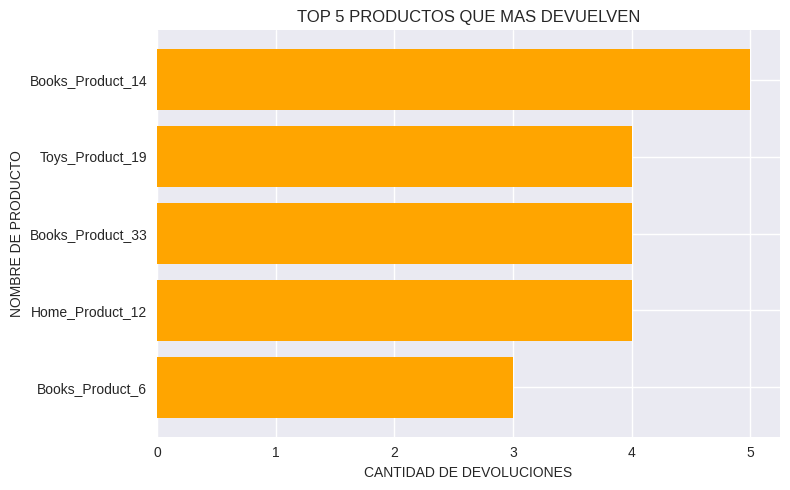

In [195]:
plt.figure(figsize=(8,5))
plt.barh(top_dev['product_name'],top_dev['devoluciones'], color='orange')
plt.xlabel('CANTIDAD DE DEVOLUCIONES', size=10)
plt.ylabel('NOMBRE DE PRODUCTO', size=10)
plt.title('TOP 5 PRODUCTOS QUE MAS DEVUELVEN')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [196]:
# 4.	Análisis de Frecuencia de Compra y Ciclos Estacionales
# o	¿Con qué frecuencia compran los clientes?
# o	¿Existen picos de venta en ciertos meses?

In [197]:
#PREPARAR LOS DATOS
oc=orders[orders['order_status']=='Completed'].copy()

In [198]:
dp(oc.head())

,order_id,customer_id,order_date,order_status,shipping_cost,payment_method,total_amount
1,ORD00001,CUST0195,2023-05-25,Completed,4.00,PayPal,663.54
2,ORD00002,CUST0142,2023-07-30,Completed,4.97,Credit Card,51.19
3,ORD00003,CUST0078,2023-02-16,Completed,14.37,Credit Card,327.77
4,ORD00004,CUST0088,2023-04-22,Completed,11.59,Credit Card,398.77
6,ORD00006,CUST0090,2023-02-15,Completed,7.98,Bank Transfer,120.80


In [199]:
print(oc['order_date'].dtype)

object


In [200]:
oc['order_date']=pd.to_datetime(oc['order_date'])

In [201]:
print(oc['order_date'].dtype)

datetime64[ns]


In [202]:
#ORDENAR POR CLIENTE Y FECHA
oc=oc.sort_values(by=['customer_id','order_date'])

In [203]:
#CALCULAR LA DIFERENCIA EN DIAS ENTRE COMPRAS DEL MISMO CLIENTE
oc['days_between_buys']=oc.groupby('customer_id')['order_date'].diff().dt.days

In [204]:
#PROMEDIO DE FRECUENCIA DE COMPRA
#PROMEDIO DE DIAS ENTRE COMPRAS POR CLIENTE
fc=oc.groupby('customer_id')['days_between_buys'].mean().reset_index()

In [205]:
dp(fc)

,customer_id,days_between_buys
0,CUST0000,16.000000
1,CUST0001,133.000000
2,CUST0002,42.500000
3,CUST0003,61.750000
4,CUST0004,38.500000
...,...,...
294,CUST0295,61.000000
295,CUST0296,90.666667
296,CUST0297,109.000000
297,CUST0298,NaN


In [206]:
fc.columns=['customer_id','mean_frecuency_days']

In [207]:
dp(fc)

,customer_id,mean_frecuency_days
0,CUST0000,16.000000
1,CUST0001,133.000000
2,CUST0002,42.500000
3,CUST0003,61.750000
4,CUST0004,38.500000
...,...,...
294,CUST0295,61.000000
295,CUST0296,90.666667
296,CUST0297,109.000000
297,CUST0298,NaN


In [208]:
#CICLOS ESTACIONES(VENTA POR MES)
#EXTRAEMOS EL MES EN NOMBRE DE ORDER DATE
# oc['mes']=oc['order_date'].dt.month_name()


#CONTEO DE PEDIDOS POR MES

# vpm=oc['mes'].value_counts().reindex(['January','February','March','April','May','June','July','August','September','October','November','December'])

In [209]:
oc['mesq']=oc['order_date'].dt.month

vpm=oc['mesq'].value_counts().sort_index()
import calendar
vpm.index=vpm.index.map(lambda x: calendar.month_name[x])
dp(vpm)

mesq
January      112
February      95
March        103
April        117
May          114
June         118
July         106
August       106
September    102
October      118
November     104
December      95
Name: count, dtype: int64

In [210]:
dp(fc.sort_values(by='mean_frecuency_days').fillna(0))
print(f"Los clientes compran con una frecuencia promedio entre {fc['mean_frecuency_days'].min()} y {fc['mean_frecuency_days'].max()} dias")

,customer_id,mean_frecuency_days
104,CUST0104,3.0
158,CUST0158,3.0
100,CUST0100,3.0
145,CUST0145,7.0
139,CUST0139,7.0
...,...,...
225,CUST0225,0.0
247,CUST0248,0.0
286,CUST0287,0.0
290,CUST0291,0.0


Los clientes compran con una frecuencia promedio entre 3.0 y 313.0 dias


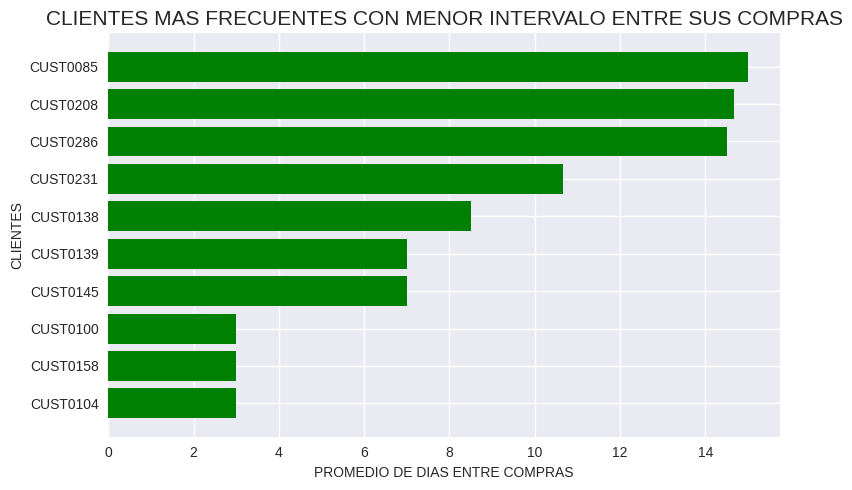

In [211]:
#TOP 10 CLIENTES QUE COMPRAN CON MAS FRECUENCIA

top_frec=fc.sort_values(by='mean_frecuency_days').head(10)
plt.figure(figsize=(8,5))
plt.barh(top_frec['customer_id'],top_frec['mean_frecuency_days'], color='green')
plt.xlabel('PROMEDIO DE DIAS ENTRE COMPRAS',size=10)
plt.ylabel('CLIENTES',size=10)
plt.title('CLIENTES MAS FRECUENTES CON MENOR INTERVALO ENTRE SUS COMPRAS',size=15)
# plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

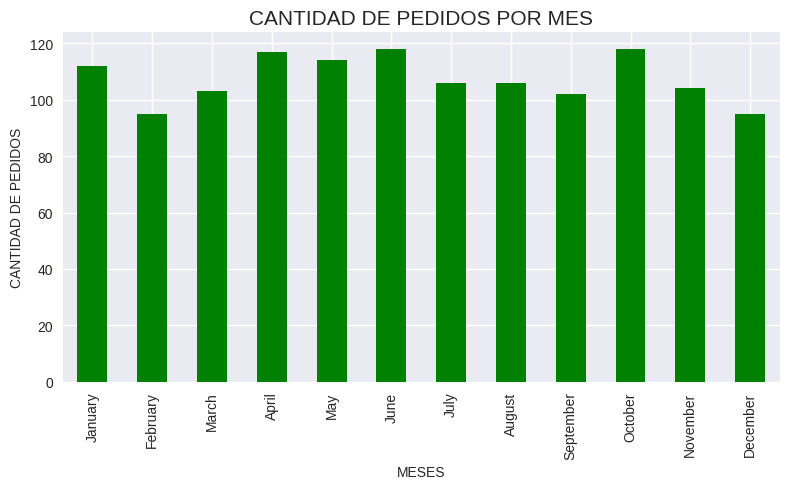

In [212]:
#VENTAS POR MES
plt.figure(figsize=(8,5))
vpm.plot(kind='bar',color='green')
plt.xlabel('MESES',size=10)
plt.ylabel('CANTIDAD DE PEDIDOS',size=10)
plt.title('CANTIDAD DE PEDIDOS POR MES',size=15)
# plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [213]:
# 5.	Sugerencia de Segmentación para Campañas de Marketing
# o	Según RFM, tipo de producto comprado, país, y método de pago.

#UNIR RFM CON EL PAIS DE CADA CLIENTE
rfm_seg=pd.merge(rfm,customer[['customer_id','country']], on='customer_id', how='left')

In [214]:
# UNIR RFM CON ORDENES PARA METODO DE PAGO
rfm_seg=rfm_seg.merge(orders[['customer_id','payment_method']],on='customer_id',how='left')

In [216]:
#OBTENER CATEGORIA MAS COMPRADA POR CLIENTE
compras=pd.merge(orders[['order_id','customer_id']],order_item[['order_id','category']], on='order_id', how='inner')

In [217]:
cat_pref=compras.groupby('customer_id')['category'].agg(lambda x: x.mode()[0]).reset_index()

In [218]:
cat_pref.columns=['customer_id','categoria_fav']

In [219]:
dp(cat_pref)

,customer_id,categoria_fav
0,CUST0000,Home
1,CUST0001,Books
2,CUST0002,Books
3,CUST0003,Clothing
4,CUST0004,Books
...,...,...
294,CUST0295,Clothing
295,CUST0296,Books
296,CUST0297,Electronics
297,CUST0298,Electronics


In [220]:
rfm_seg=pd.merge(rfm_seg, cat_pref, on='customer_id',how='left')

In [221]:
dp(rfm_seg)

,customer_id,order_date,order_id,total_amount,R_puntaje,F_puntaje,M_puntaje,RFM_puntaje,Clasificar,country,payment_method,categoria_fav
0,CUST0000,190,3,1888.30,1,1,3,113,CLIENTE BAJO POTENCIAL,Colombia,PayPal,Home
1,CUST0000,190,3,1888.30,1,1,3,113,CLIENTE BAJO POTENCIAL,Colombia,PayPal,Home
2,CUST0000,190,3,1888.30,1,1,3,113,CLIENTE BAJO POTENCIAL,Colombia,Credit Card,Home
3,CUST0000,190,3,1888.30,1,1,3,113,CLIENTE BAJO POTENCIAL,Colombia,Credit Card,Home
4,CUST0001,24,3,1265.92,4,1,2,412,CLIENTE NUEVO,Mexico,Credit Card,Books
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,CUST0298,49,1,296.15,3,1,1,311,CLIENTE PERDIDO,Mexico,Bank Transfer,Electronics
1496,CUST0299,159,3,1071.05,1,1,2,112,CLIENTE PERDIDO,Spain,PayPal,Books
1497,CUST0299,159,3,1071.05,1,1,2,112,CLIENTE PERDIDO,Spain,Credit Card,Books
1498,CUST0299,159,3,1071.05,1,1,2,112,CLIENTE PERDIDO,Spain,Bank Transfer,Books


In [222]:
def clasificar_segmento(rfm_row):
    r,f,m=rfm_row['R_puntaje'],rfm_row['F_puntaje'],rfm_row['M_puntaje']
    if r <= 2 and f >=4 and m >= 4:
        return 'CLIENTE EN RIESGO ALTO'
    elif r>= 4 and f <= 2:
        return 'CLIENTE NUEVO'
    elif r>=4 and f>= 4 and m >= 4:
        return 'CLIENTE VIP'
    elif r >= 3 and f >=3:
        return 'CLIENTE LEAL'
    else:
        return 'CLIENTE REGULAR'

In [223]:
rfm_seg['Marketing_Class']=rfm_seg.apply(clasificar_segmento, axis=1)

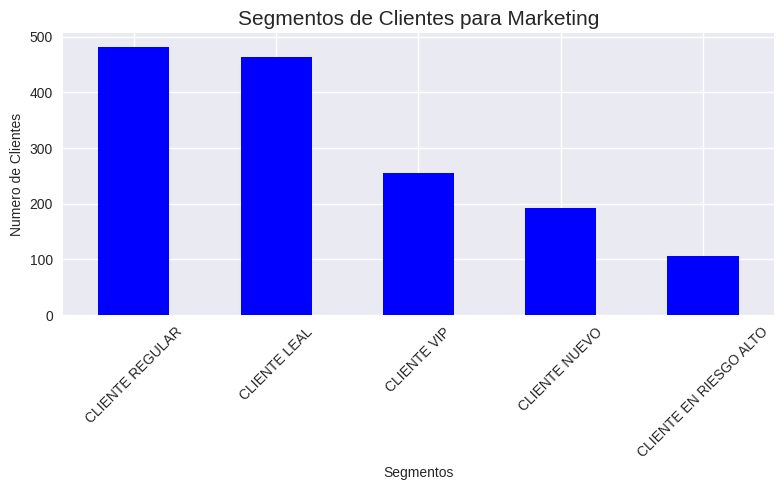

In [224]:
#conteo de segmentos

cont_seg= rfm_seg['Marketing_Class'].value_counts()

plt.figure(figsize=(8,5))
cont_seg.plot(kind='bar',color='blue')
plt.xlabel('Segmentos',size=10)
plt.ylabel('Numero de Clientes',size=10)
plt.title('Segmentos de Clientes para Marketing',size=15)
# plt.gca().invert_yaxis()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [225]:
resume=rfm_seg.groupby(['Marketing_Class','country','payment_method','categoria_fav']).size().reset_index(name='clientes')

In [226]:
resume=resume.sort_values('clientes', ascending=False)

In [227]:
dp(resume)

,Marketing_Class,country,payment_method,categoria_fav,clientes
56,CLIENTE LEAL,Mexico,PayPal,Clothing,30
161,CLIENTE REGULAR,Mexico,Credit Card,Books,27
46,CLIENTE LEAL,Mexico,Bank Transfer,Clothing,25
241,CLIENTE VIP,USA,PayPal,Clothing,23
51,CLIENTE LEAL,Mexico,Credit Card,Clothing,23
...,...,...,...,...,...
193,CLIENTE REGULAR,USA,Credit Card,Home,1
210,CLIENTE VIP,Colombia,Credit Card,Books,1
216,CLIENTE VIP,Mexico,Bank Transfer,Books,1
219,CLIENTE VIP,Mexico,Bank Transfer,Home,1
